<a href="https://colab.research.google.com/github/LaiTienQuang/LaiTienQuang/blob/main/robot_forward_kinematics_2dof_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Khai báo thư viện

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

2. đưa dữ liệu lên colab

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving robot_2b.csv to robot_2b.csv


3. XỬ LÝ DỮ LIỆU

In [ ]:
data = pd.read_csv('robot_2b.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]
x=numpy_dataset[:,2:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train[0])
print(y_train[0])

[ 2.37223875 59.47840011]
[46. 98.]


In [ ]:
print("Original data is:",x_train)
print("Shape of data is: ",x_train.shape)

Original data is: [[  2.37223875  59.47840011]
 [  7.1476937   72.69785727]
 [-23.45096839  86.20461117]
 ...
 [ 63.33290934  63.82571102]
 [ 43.05407289  39.39231012]
 [-25.37354099 -31.52043014]]
Shape of data is:  (26208, 2)


In [ ]:
print("Original data is:",y_train)
print("Shape of data is: ",y_train.shape)

Original data is: [[ 46.  98.]
 [ 53.  72.]
 [ 99.  14.]
 ...
 [ 43.   5.]
 [  0. 100.]
 [180. 128.]]
Shape of data is:  (26208, 2)


4. TRAIN MODEL

In [ ]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

In [ ]:
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.2)

Epoch 1/20
656/656 [==============================] - 6s 5ms/step - loss: 3886.4185 - acc: 0.6643 - val_loss: 1031.4448 - val_acc: 0.8283
Epoch 2/20
656/656 [==============================] - 3s 4ms/step - loss: 751.9307 - acc: 0.8488 - val_loss: 150.6697 - val_acc: 0.9424
Epoch 3/20
656/656 [==============================] - 3s 5ms/step - loss: 524.4810 - acc: 0.8848 - val_loss: 87.2664 - val_acc: 0.9550
Epoch 4/20
656/656 [==============================] - 3s 4ms/step - loss: 468.7824 - acc: 0.8929 - val_loss: 95.1228 - val_acc: 0.9475
Epoch 5/20
656/656 [==============================] - 3s 4ms/step - loss: 434.2563 - acc: 0.8978 - val_loss: 68.7324 - val_acc: 0.9548
Epoch 6/20
656/656 [==============================] - 3s 4ms/step - loss: 411.0159 - acc: 0.9032 - val_loss: 108.4607 - val_acc: 0.9391
Epoch 7/20
656/656 [==============================] - 3s 4ms/step - loss: 398.8716 - acc: 0.9022 - val_loss: 50.7363 - val_acc: 0.9580
Epoch 8/20
656/656 [==============================

5. KIỂM TRA KẾT QUẢ

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1])

sai so kiem tra la 49.13950729370117
do chinh xac kiem tra 0.9493361711502075


In [ ]:
import matplotlib.pyplot as plt
import math
import csv
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


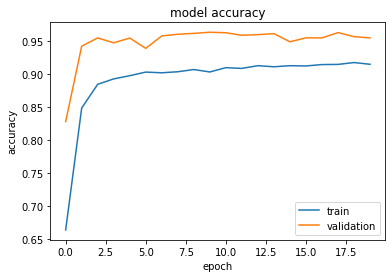

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

6. TEST THỰC NGHIỆM

In [ ]:
Px_test_train = 0
Py_test_train = 45
print(Px_test_train,Py_test_train)
test = model.predict([[Px_test_train,Py_test_train]])
t1 = test[0][0]
t2 = test[0][1]
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))
print('x = ',x_1,'y = ',y_1)
print(t1,t2)

0 45
x =  4.417843509719795 y =  50.06028113167514
37.928276 113.17948


7. LƯU MODEL

In [ ]:
model.save('Robot_2dof.h5')